<a href="https://colab.research.google.com/github/fakheramansuri/project/blob/main/BharatIntern_Task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train)

In [ ]:
import matplotlib.pyplot as plt

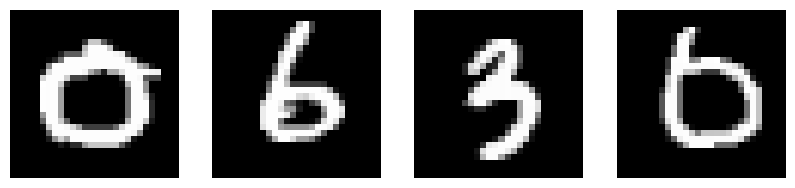

In [ ]:
fig, axs = plt.subplots(1, 4, figsize= (10, 10))
axs[0].imshow(X_train[0], cmap='gray')
axs[1].imshow(X_train[5], cmap='gray')
axs[2].imshow(X_train[9], cmap='gray')
axs[3].imshow(X_train[12], cmap='gray')
axs[0].axis(False)
axs[1].axis(False)
axs[2].axis(False)
axs[3].axis(False)
fig.show()

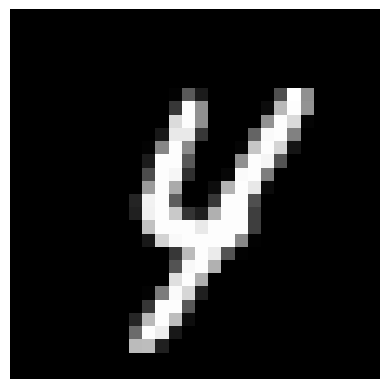

In [ ]:
plt.imshow(X_train[33], cmap='gray', vmin=0, vmax=255)
plt.axis(False)
plt.show()

In [ ]:
model = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=(28, 28)),
     keras.layers.Dense(300, activation = 'relu'),
     keras.layers.Dense(100, activation = 'relu'),
     keras.layers.Dense(50, activation = 'relu'),
     keras.layers.Dense(10, activation = 'softmax')]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 271160 (1.03 MB)
Trainable params: 271160 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


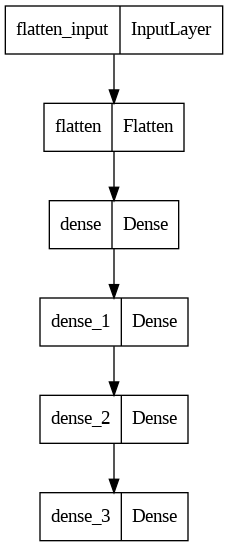

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.compile(loss = [keras.losses.sparse_categorical_crossentropy]
              , optimizer = keras.optimizers.Adam(),
              metrics = [keras.metrics.sparse_categorical_accuracy])

In [ ]:
#check_point = keras.callbacks.ModelCheckpoint("mnist_keras_v0.h5")
early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                              restore_best_weights = True)

In [ ]:
X_train.shape

(45000, 28, 28)

In [ ]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_val, y_val),
                    callbacks = [early_stopping])

Epoch 1/30
1407/1407 [==============================] - 13s 4ms/step - loss: 1.4595 - sparse_categorical_accuracy: 0.8701 - val_loss: 0.3738 - val_sparse_categorical_accuracy: 0.9173
Epoch 2/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2493 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.2168 - val_sparse_categorical_accuracy: 0.9424
Epoch 3/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1916 - sparse_categorical_accuracy: 0.9497 - val_loss: 0.2200 - val_sparse_categorical_accuracy: 0.9455
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1713 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.2198 - val_sparse_categorical_accuracy: 0.9441
Epoch 5/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1370 - sparse_categorical_accuracy: 0.9612 - val_loss: 0.1556 - val_sparse_categorical_accuracy: 0.9591
Epoch 6/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1247 - spar

In [ ]:
import pandas as pd

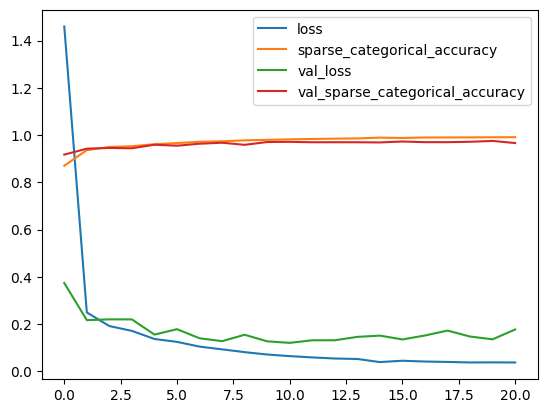

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1141 - sparse_categorical_accuracy: 0.9742


[0.11413557082414627, 0.9742000102996826]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1141 - sparse_categorical_accuracy: 0.9742


[0.11413557082414627, 0.9742000102996826]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np

In [ ]:
conf_mat = confusion_matrix(y_true = y_test, y_pred = np.argmax(model.predict(X_test), axis = 1))

313/313 [==============================] - 1s 2ms/step


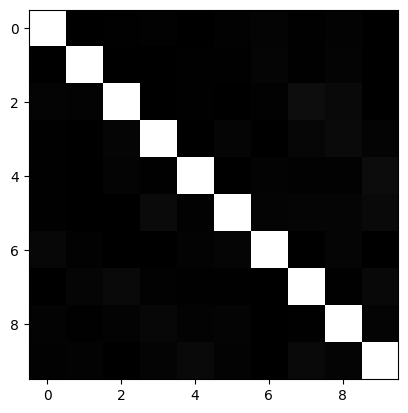

In [ ]:
plt.imshow(conf_mat, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 0.95)

In [ ]:
X_train = pca.fit_transform(X_train.reshape(45000, -1))
X_test = pca.transform(X_test.reshape(X_test.shape[0], -1))
X_val = pca.transform(X_val.reshape(X_val.shape[0], -1))

In [ ]:
pca.n_components_

154

In [ ]:
model = keras.models.Sequential(
    [keras.layers.InputLayer(input_shape = [154]),
     keras.layers.Dense(100, activation = 'relu'),
     keras.layers.Dense(50, activation = 'relu'),
     keras.layers.Dense(10, activation = 'softmax')]
)

In [ ]:
model.compile(loss = [keras.losses.sparse_categorical_crossentropy],
              optimizer = keras.optimizers.Adam(),
              metrics = [keras.metrics.sparse_categorical_accuracy])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience = 10,
                                               restore_best_weights = True)

In [ ]:
history = model.fit(X_train, y_train, epochs = 10,
          validation_data = (X_val, y_val),
          callbacks = [early_stopping])

Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 5.7171 - sparse_categorical_accuracy: 0.8060 - val_loss: 0.9597 - val_sparse_categorical_accuracy: 0.8427
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5560 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.5176 - val_sparse_categorical_accuracy: 0.8905
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3135 - sparse_categorical_accuracy: 0.9192 - val_loss: 0.4212 - val_sparse_categorical_accuracy: 0.9131
Epoch 4/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2471 - sparse_categorical_accuracy: 0.9329 - val_loss: 0.3418 - val_sparse_categorical_accuracy: 0.9225
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2084 - sparse_categorical_accuracy: 0.9445 - val_loss: 0.2957 - val_sparse_categorical_accuracy: 0.9267
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1793 - spars

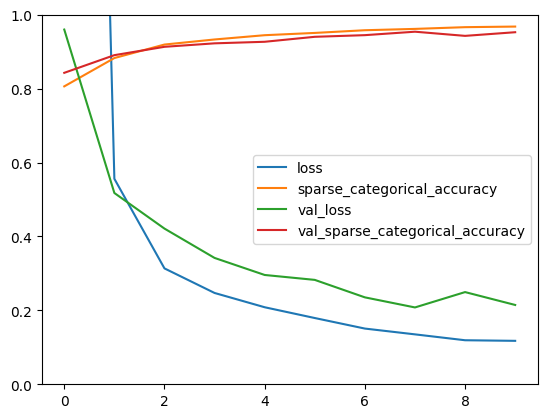

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2102 - sparse_categorical_accuracy: 0.9531


[0.21022285521030426, 0.9531000256538391]

In [ ]:
conf_mat = confusion_matrix(y_true = y_test, y_pred = np.argmax(model.predict(X_test), axis = 1))

313/313 [==============================] - 1s 2ms/step


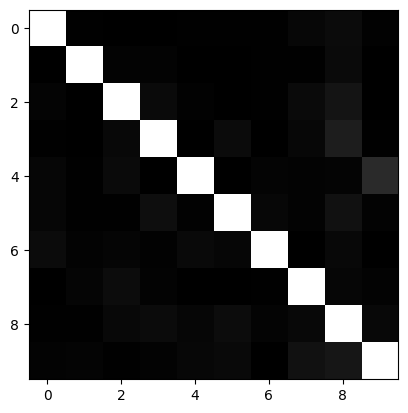

In [ ]:
plt.imshow(conf_mat, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout


In [ ]:

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(100, activation='relu'),
    Dropout(0.5),  # Dropout with a rate of 0.5
    keras.layers.Dense(50, activation='relu'),
    Dropout(0.5),  # Dropout with a rate of 0.5
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


Epoch 1/30
1407/1407 [==============================] - 8s 5ms/step - loss: 22.8627 - sparse_categorical_accuracy: 0.2522 - val_loss: 2.1712 - val_sparse_categorical_accuracy: 0.1919
Epoch 2/30
1407/1407 [==============================] - 6s 4ms/step - loss: 2.2488 - sparse_categorical_accuracy: 0.2274 - val_loss: 1.9051 - val_sparse_categorical_accuracy: 0.3173
Epoch 3/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.9994 - sparse_categorical_accuracy: 0.2884 - val_loss: 1.5580 - val_sparse_categorical_accuracy: 0.4514
Epoch 4/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7679 - sparse_categorical_accuracy: 0.3832 - val_loss: 1.2661 - val_sparse_categorical_accuracy: 0.5467
Epoch 5/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5245 - sparse_categorical_accuracy: 0.4711 - val_loss: 0.9754 - val_sparse_categorical_accuracy: 0.6536
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3563 - spar